In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
data=df[['price', 'bedrooms','bathrooms','sqft_living','yr_built',]]

<AxesSubplot:>

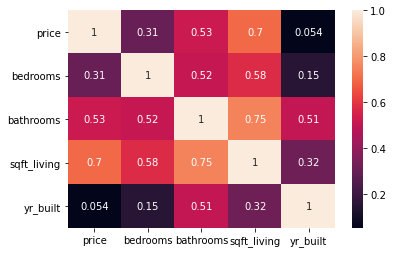

In [11]:
sns.heatmap(data.corr(),annot=True)

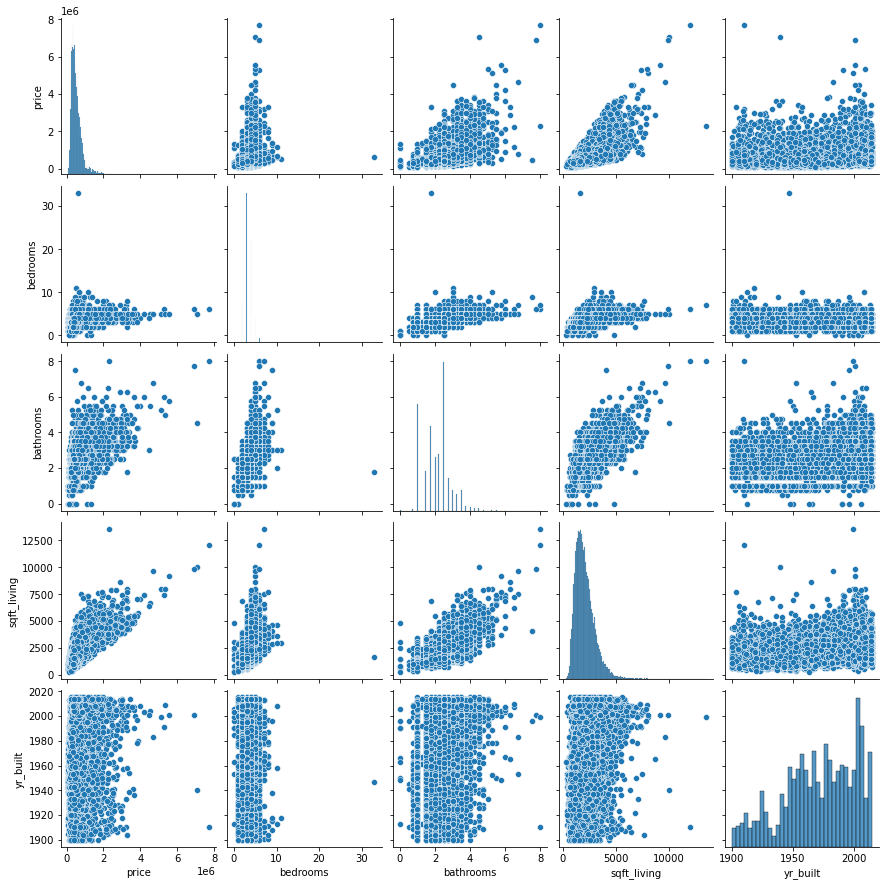

In [12]:
sns.pairplot(data)

In [16]:
X=df[[ 'bedrooms','bathrooms','sqft_living','yr_built',]]

In [17]:
y=df[['price']]

### Creating and Training the Mode

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [25]:
X_train

,bedrooms,bathrooms,sqft_living,yr_built
2435,3,2.25,2550,1959
256,4,1.75,2360,1955
13911,3,1.75,1770,1914
1135,7,3.00,2940,1977
12181,4,2.50,2210,1993
...,...,...,...,...
5695,3,2.25,1920,1984
8006,3,1.00,1240,1902
17745,3,2.25,1780,1987
17931,2,1.00,1150,1924


In [27]:
lm.fit(X_train,y_train)

LinearRegression()

### Predictions from our Model

In [93]:
prediction=lm.predict(X_test)

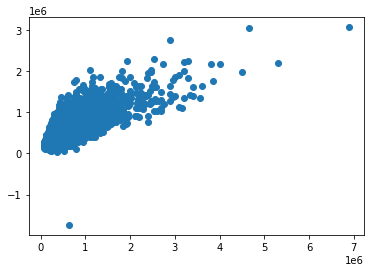

In [31]:
plt.scatter(y_test,prediction)

In [49]:
y_predict=lm.predict(X_test.iloc[[0]])

In [50]:
y_predict

array([[419242.03904071]])

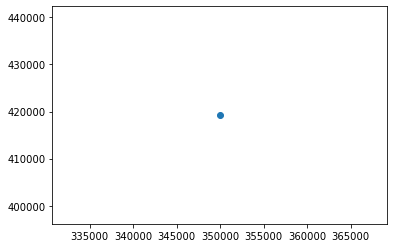

In [72]:
plt.scatter(y_test.iloc[[0]],y_predict)

### Regression Evaluation Metrics

In [73]:
from sklearn import metrics

### Mean Squared Error (MSE) 

In [97]:
print('MSE:', metrics.mean_squared_error(y_test, prediction))

MSE: 59244261170.21254
